## Rapport TME1 - Arbres de décision, sélection de modèles

Membres du binôme :
- KRISNI Almehdi
- ARICHANDRA Santhos

Dans ce TME, on prend en main les algorithmes d'estimation de densité, soit les histogrammes et les méthodes à noyaux. On utilise 2 classes, dont le code est founi: *Histogramme* et *KernelDensity*, qui héritent de la classe abstraite *Density*.

On complète le code de la classe *Density* avec une méthode **score(data)** permettant de renvoyer la log-vraisemblance des données *data* à l'estimateur. On gère les densités nulles avec une très petite valeur à chaque vraisemblance avant le passage au log.

### **Chargement et visualisation des données - API Google Places, Points d'intérêt de Paris**

Les données ont été chargées dans le fichier *tme2.py*. On peut alors commencer par afficher les différents types de points d'intérêt.

In [1]:
# Import du fichier tme2.py
from tme2 import *

# On affiche les différents points d'intérêt (POI)
print("Les différents types de POI sont :", ", ".join(poidata), sep="\n")

Les différents types de POI sont :
furniture_store, laundry, bakery, cafe, home_goods_store, clothing_store, atm, lodging, night_club, convenience_store, restaurant, bar


On dispose désormais de la liste de tous les types de POI présents sur Paris et ses alentours. On affiche maintenant la carte de la ville tout en affichant un type de POI particulier, par exemple les bars ou les restaurants.

Carte de Paris avec affichage des bar


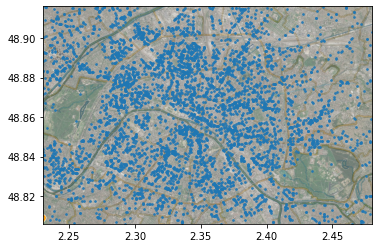

In [2]:
# On sélectionne le type de POI allant être utilisé pendant l'affichage de la carte
choicePOI = "bar"

# Affichage de la carte avec tous les POI du type selectionné
show_poi(choicePOI)

Carte de Paris avec affichage des restaurant


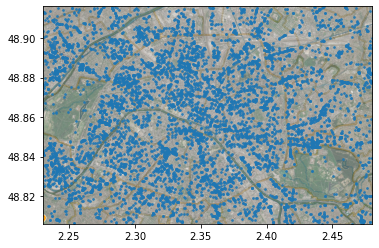

In [3]:
# On sélectionne le type de POI allant être utilisé pendant l'affichage de la carte
choicePOI = "restaurant"

# Affichage de la carte avec tous les POI du type selectionné
show_poi(choicePOI)

### **Méthode par histogramme**

Afin de pouvoir utiliser la méthode par histogramme, on doit coder les méthodes fondamentales de la classe *Histogramme*. Dans l'idéal, les méthodes devraient pouvoir gérer des données de dimension quelconques même si celles que nous utiliseront dans le cadre du TME sont toutes en 2D. Le paramètre *steps* du constructeur permet de spécifier le nombre d'intervalles de discrétisation de chaque dimension, soit la forme du quadrillage sur la carte. Le quadrillage est de dimension **(steps x steps)**.

Dans notre cas, l'estimation de densité par histogramme est relativement simple puisqu'il s'agit de compter le nombre d'instances d'un certain type de POI dans une zone précise de la carte. Le quadrillage réalisé permet d'effectuer un comptage dans chaque case.

On utilise la librairie *numpy* afin de gérer l'estimation des histogrammes. On réalise quelques tests sur la classe avec des valeurs de steps variées.

In [4]:
# Création d'un Histogramme
nbSteps = 10
hist = Histogramme(steps=nbSteps)

# On réalise un apprentisage sur les bars
barData, _ = load_poi("bar")
hist.fit(barData)

# On affiche le score obtenu par l'histogramme sur les même données
print("Score de précision de l'histogramme pour", nbSteps, "steps :", hist.score(barData))


Score de précision de l'histogramme pour 10 steps : 18897.828080995117


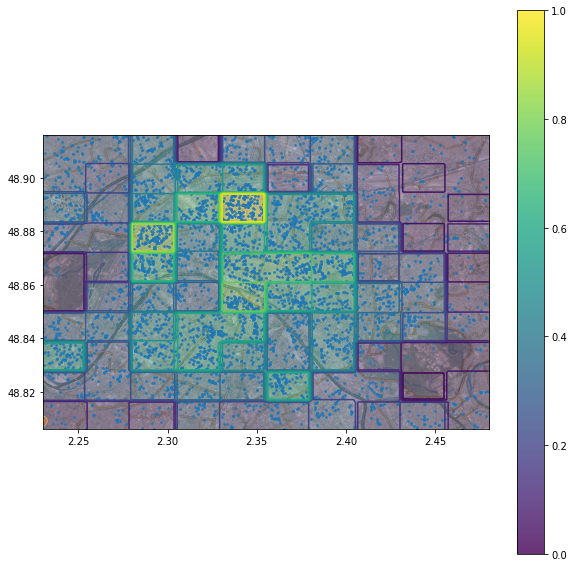

In [5]:
# On utilise la méthode show_density
show_density(hist, barData)